In [1]:
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

# Data loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
flights = pd.read_csv("/content/drive/MyDrive/DataScience/Projekt końcowy/new_flights.csv", low_memory=True)

flights.sample(10)

,MONTH,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,AIR_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
445456,1,6,Delta Airlines,2437,N924AT,Gen. Edward Lawrence Logan International Airport,Hartsfield-Jackson Atlanta International Airport,06:00:00,-11.0,129.0,946,09:13:00,-20.0,0.0,0.0,0.0,0.0,0.0,2015-01-31
3037609,7,2,Envoy Air,3111,N664MQ,Dallas/Fort Worth International Airport,Laredo International Airport,12:15:00,29.0,58.0,396,13:41:00,24.0,0.0,0.0,0.0,24.0,0.0,2015-07-14
555886,2,7,Delta Airlines,2031,N318US,Chicago Midway International Airport,Hartsfield-Jackson Atlanta International Airport,07:10:00,40.0,81.0,591,10:10:00,15.0,0.0,0.0,15.0,0.0,0.0,2015-02-08
7773,1,4,Spirit Airlines,906,N632NK,Denver International Airport,George Bush Intercontinental Airport,15:05:00,13.0,124.0,862,18:24:00,30.0,30.0,0.0,0.0,0.0,0.0,2015-01-01
2734805,6,4,SkyWest Airlines,6453,N699BR,Reno/Tahoe International Airport,Los Angeles International Airport,19:39:00,-7.0,73.0,391,21:19:00,23.0,23.0,0.0,0.0,0.0,0.0,2015-06-25
2222489,5,1,SkyWest Airlines,7420,N781CA,Ford Airport,Minneapolis-Saint Paul International Airport,13:04:00,0.0,46.0,257,14:15:00,-2.0,0.0,0.0,0.0,0.0,0.0,2015-05-25
3344427,8,6,Delta Airlines,972,N813DN,Detroit Metropolitan Airport,Hartsfield-Jackson Atlanta International Airport,17:47:00,1.0,79.0,594,19:48:00,-10.0,0.0,0.0,0.0,0.0,0.0,2015-08-01
2428711,6,7,ExpressJet,4336,N14117,Newark Liberty International Airport,Washington Dulles International Airport,10:26:00,-7.0,43.0,212,11:43:00,-21.0,0.0,0.0,0.0,0.0,0.0,2015-06-07
2886655,7,7,Southwest Airlines,848,N233LV,William P. Hobby Airport,Pensacola International Airport (Pensacola Gul...,12:30:00,-2.0,65.0,488,13:55:00,-12.0,0.0,0.0,0.0,0.0,0.0,2015-07-05
929036,3,4,American Airlines,726,N840AW,Los Angeles International Airport,Pittsburgh International Airport,11:40:00,34.0,237.0,2136,19:08:00,27.0,0.0,0.0,10.0,17.0,0.0,2015-03-05


# Delay format change

In the column 'DEPARTURE_DELAY' and 'ARRIVAL_DELAY' we can see values below 0 which indicates departure or arrival before sheduled time and values above 0, that indicated delays. We decided to change the format. For values <0 we set 0 as NO DELAY and >0 as 1 that will be delay.

In [ ]:
status = []

for value in flights['ARRIVAL_DELAY']:
    if value <= 0:
        status.append(0)
    else:
        status.append(1)
flights['FLIGHT_STATUS'] = status 

In [ ]:
flights['FLIGHT_STATUS'].value_counts()

0    3285484
1    1945646
Name: FLIGHT_STATUS, dtype: int64

[Text(0.5, 0, 'Number of counts')]

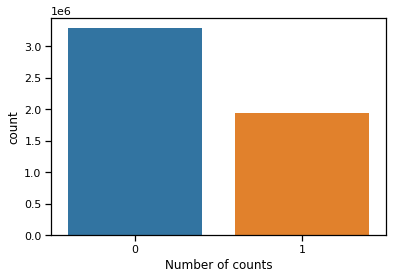

In [ ]:
sns.set_context("notebook")
g=sns.countplot(x="FLIGHT_STATUS",data=flights)
g.set(xlabel="Number of counts")

In [21]:
d=flights.ARRIVAL_DELAY.value_counts().rename_axis('arrival_delay').reset_index(name= 'number_of_events').sort_values(by=['arrival_delay'])
d

,arrival_delay,number_of_events
997,-87.0,2
1138,-82.0,1
1214,-81.0,1
799,-80.0,3
1149,-79.0,1
...,...,...
887,1636.0,2
1079,1638.0,1
1051,1665.0,1
1046,1898.0,1


(-60.0, 240.0)

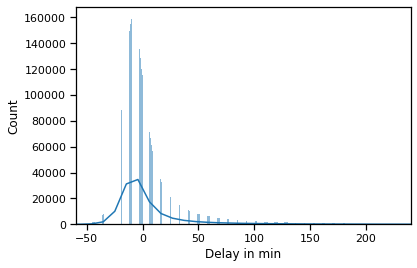

In [34]:
#histplot of arrival delay
h=sns.histplot(data=flights, x="ARRIVAL_DELAY", kde=True)
h.set(xlabel='Delay in min')
h.set_xlim(-60, 240)


(-60.0, 240.0)

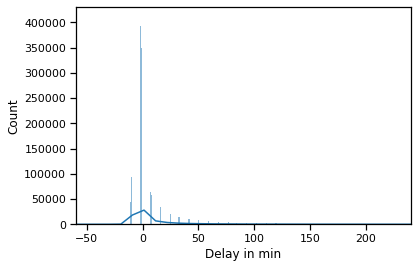

In [38]:
#Histplot of departure delay

h_d=sns.histplot(data=flights, x="DEPARTURE_DELAY", kde=True)
h_d.set(xlabel='Delay in min')
h_d.set_xlim(-60, 240)



In [ ]:
# delete of ['ARRIVAL DELAY'] column

flights.drop(['ARRIVAL_DELAY'], axis = 1, inplace = True)


In [ ]:
flights.sample(10)

,MONTH,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,AIR_TIME,DISTANCE,SCHEDULED_ARRIVAL,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE,FLIGHT_STATUS
1468351,4,2,Southwest Airlines,1708,N269WN,Louis Armstrong New Orleans International Airport,William P. Hobby Airport,21:30:00,27.0,52.0,302,22:40:00,0.0,0.0,0.0,24.0,0.0,2015-04-07,1
3543208,8,4,American Airlines,2464,N861AA,Orlando International Airport,Dallas/Fort Worth International Airport,16:02:00,83.0,144.0,985,17:50:00,13.0,0.0,0.0,83.0,0.0,2015-08-13,1
2006388,5,1,Spirit Airlines,424,N531NK,Los Angeles International Airport,Minneapolis-Saint Paul International Airport,18:47:00,15.0,183.0,1535,00:17:00,0.0,0.0,0.0,0.0,0.0,2015-05-11,0
4544574,11,1,Frontier Airlines,1148,N951FR,Hartsfield-Jackson Atlanta International Airport,Orlando International Airport,16:05:00,-3.0,62.0,404,17:25:00,0.0,0.0,0.0,0.0,0.0,2015-11-16,0
3344164,8,6,SkyWest Airlines,4562,N549CA,Minneapolis-Saint Paul International Airport,Great Falls International Airport,17:30:00,112.0,118.0,887,18:59:00,0.0,0.0,26.0,77.0,0.0,2015-08-01,1
2148726,5,3,Southwest Airlines,597,N907WN,Orlando International Airport,Raleigh-Durham International Airport,15:10:00,0.0,78.0,534,16:50:00,0.0,0.0,0.0,0.0,0.0,2015-05-20,0
2605440,6,4,ExpressJet,4896,N882AS,Greater Rochester International Airport,Detroit Metropolitan Airport,06:10:00,-5.0,53.0,296,07:29:00,0.0,0.0,0.0,0.0,0.0,2015-06-18,0
3149568,7,2,JetBlue Airways,1137,N187JB,Gen. Edward Lawrence Logan International Airport,Detroit Metropolitan Airport,07:36:00,19.0,106.0,632,09:51:00,0.0,0.0,15.0,0.0,0.0,2015-07-21,1
3713583,8,1,Southwest Airlines,2016,N413WN,McCarran International Airport,San Diego International Airport (Lindbergh Field),10:20:00,-4.0,43.0,258,11:35:00,0.0,0.0,0.0,0.0,0.0,2015-08-24,0
446405,1,6,Southwest Airlines,3620,N247WN,Kansas City International Airport,Tampa International Airport,07:05:00,-6.0,127.0,1048,10:40:00,0.0,0.0,0.0,0.0,0.0,2015-01-31,0


In [ ]:
flights.to_csv('/content/drive/MyDrive/DataScience/flights_prep2.csv')

In [ ]:
flights.dtypes

MONTH                    int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE     object
DEPARTURE_DELAY        float64
AIR_TIME               float64
DISTANCE                 int64
SCHEDULED_ARRIVAL       object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
DATE                    object
FLIGHT_STATUS            int64
dtype: object


# Delay distribution depending of the month

For further modeling we wolud like to use data from one month. Chosen month should be year representative thus we decided to analyse which one is similar to year mean.

In [ ]:
monthly_flights = flights.MONTH.value_counts().iloc[0:11].rename_axis('MONTH').reset_index(name= 'TOTAL FLIGHTS').sort_values(by=['MONTH'])
monthly_flights = pd.DataFrame(monthly_flights)
monthly_flights

,MONTH,TOTAL FLIGHTS
9,1,457013
10,2,407663
3,3,492138
5,4,479251
4,5,489641
2,6,492847
0,7,514384
1,8,503956
8,9,462153
7,11,462367


In [ ]:
monthly_delay = flights.groupby('MONTH').agg(delay_sum =('FLIGHT_STATUS', np.sum), delay_avg = ('FLIGHT_STATUS', np.average)).reset_index()
monthly_delay = pd.DataFrame(monthly_delay)
monthly_delay

,MONTH,delay_sum,delay_avg
0,1,183110,0.400667
1,2,175443,0.430363
2,3,190133,0.386341
3,4,171820,0.358518
4,5,175178,0.357768
5,6,206989,0.419986
6,7,199717,0.388264
7,8,180891,0.358942
8,9,133432,0.288718
9,11,149439,0.323204


In [ ]:
monthly_delay = pd.merge(monthly_delay, monthly_flights, on="MONTH")
monthly_delay

,MONTH,delay_sum,delay_avg,TOTAL FLIGHTS
0,1,183110,0.400667,457013
1,2,175443,0.430363,407663
2,3,190133,0.386341,492138
3,4,171820,0.358518,479251
4,5,175178,0.357768,489641
5,6,206989,0.419986,492847
6,7,199717,0.388264,514384
7,8,180891,0.358942,503956
8,9,133432,0.288718,462153
9,11,149439,0.323204,462367


In [ ]:
# Adding new delay factor -> percetage of delays: (delay_sum/TOTAL_FLIGHTS)*100

monthly_delay['delay_percentage'] = (monthly_delay['delay_sum']/monthly_delay['TOTAL FLIGHTS'])*100
monthly_delay


,MONTH,delay_sum,delay_avg,TOTAL FLIGHTS,delay_percentage
0,1,183110,0.400667,457013,40.066694
1,2,175443,0.430363,407663,43.036282
2,3,190133,0.386341,492138,38.634082
3,4,171820,0.358518,479251,35.851777
4,5,175178,0.357768,489641,35.776824
5,6,206989,0.419986,492847,41.998632
6,7,199717,0.388264,514384,38.826441
7,8,180891,0.358942,503956,35.894205
8,9,133432,0.288718,462153,28.871824
9,11,149439,0.323204,462367,32.320429


In [ ]:
# year mean sum of delay

delay_monthly_mean = monthly_delay['delay_sum'].mean()
delay_monthly_mean

176876.9090909091

In [ ]:
flights['MONTH'] = flights['MONTH'].astype('category')
flights['DAY_OF_WEEK'] = flights['DAY_OF_WEEK'].astype('category')

flights.dtypes

MONTH                  category
DAY_OF_WEEK            category
AIRLINE                  object
FLIGHT_NUMBER             int64
TAIL_NUMBER              object
ORIGIN_AIRPORT           object
DESTINATION_AIRPORT      object
SCHEDULED_DEPARTURE      object
DEPARTURE_DELAY         float64
AIR_TIME                float64
DISTANCE                  int64
SCHEDULED_ARRIVAL        object
AIR_SYSTEM_DELAY        float64
SECURITY_DELAY          float64
AIRLINE_DELAY           float64
LATE_AIRCRAFT_DELAY     float64
WEATHER_DELAY           float64
DATE                     object
FLIGHT_STATUS             int64
dtype: object

In [ ]:
# year delay mean 

delays_mean = flights['FLIGHT_STATUS'].mean()
delays_mean

0.37193608264371175

In [ ]:
total_flights_mean = monthly_delay['TOTAL FLIGHTS'].mean()
total_flights_mean

475557.2727272727

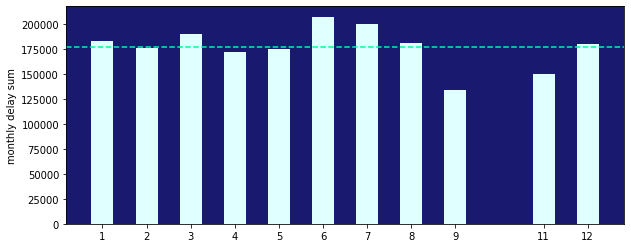

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.bar(monthly_delay['MONTH'], monthly_delay['delay_sum'], color = 'lightcyan', width=0.5)
ax.set_facecolor(color = 'midnightblue')
ax.set_ylabel('monthly delay sum')
ax.set_xticks(monthly_delay['MONTH'])
ax.axhline(y= delay_monthly_mean, color='mediumspringgreen', linestyle='--')

plt.show()

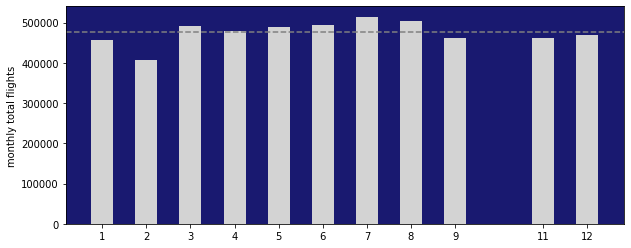

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.bar(monthly_delay['MONTH'], monthly_delay['TOTAL FLIGHTS'], color = 'lightgrey', width=0.5)
ax.set_facecolor(color = 'midnightblue')
ax.set_ylabel('monthly total flights')
ax.set_xticks(monthly_delay['MONTH'])

ax.axhline(y= total_flights_mean, color='grey', linestyle='--')

plt.show()


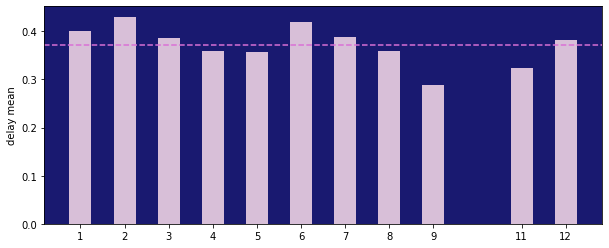

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.bar(monthly_delay['MONTH'], monthly_delay['delay_avg'], color = 'thistle', width=0.5)
ax.set_facecolor(color = 'midnightblue')
ax.set_ylabel('delay mean')
ax.set_xticks(monthly_delay['MONTH'])
ax.axhline(y= delays_mean, color='orchid', linestyle='--')
plt.show()

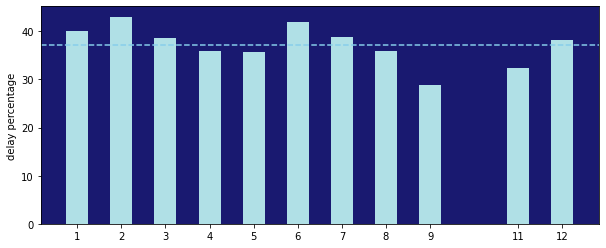

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.bar(monthly_delay['MONTH'], monthly_delay['delay_percentage'], color = 'powderblue', width=0.5)
ax.set_facecolor(color = 'midnightblue')
ax.set_ylabel('delay percentage')
ax.set_xticks(monthly_delay['MONTH'])
ax.axhline(y= monthly_delay['delay_percentage'].mean(), color='skyblue', linestyle='--')
plt.show()

Following these analysis, we decided to use data from **April and December**

# Delay distribution depending on the day of week


[Text(0.5, 0, 'Number of counts')]

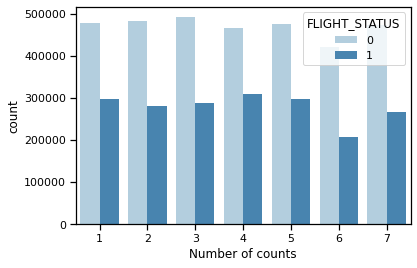

In [ ]:
sns.set_context("notebook")
g=sns.countplot(x="DAY_OF_WEEK",data=flights, hue="FLIGHT_STATUS", palette='Blues')
g.set(xlabel="Number of counts")

* We can say that significantly lower walue of flights and delays is on saturday 

[Text(0.5, 0, 'Number of counts')]

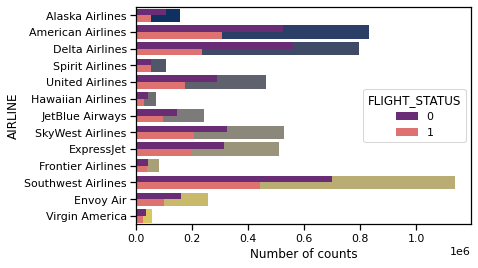

In [ ]:

sns.set_context("notebook")
g=sns.countplot(y="AIRLINE", data=flights, palette='cividis')
g=sns.countplot(y="AIRLINE", data=flights, hue="FLIGHT_STATUS", palette='magma')


g.set(xlabel="Number of counts")